In [ ]:
!pip install torchtext

In [8]:
!pip install scikit-learn

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 5.2 MB/s eta 0:00:00a 0:00:01


In [3]:
from torchtext.vocab import GloVe  # 导入GloVe词向量

# 简单介绍一下GloVe词向量，它是斯坦福大学的研究者在2014年开发和发布的
# GloVe和word2vec与fasttext，是当前最常用的3个词向量版本
# 6B表示了模型是基于60 亿个单词的语料库训练的
# 300表示一个单词，使用300维的向量表示
glove = GloVe(name='6B', dim=300)

/root/miniconda3/lib/python3.12/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/root/miniconda3/lib/python3.12/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
.vector_cache/glove.6B.zip: 862MB [05:53, 2.44MB/s]                               
100%|█████████▉| 399999/400000 [00:35<00:00, 11399.38it/s]


In [4]:
import torch
from torch import nn

# 使用nn.Embedding创建词嵌入层
# 将glove.vectors，通过from_pretrained接口，导入到Embedding层中
# 此时的embedding层，就载入了GloVe词向量数据
embedding = nn.Embedding.from_pretrained(glove.vectors)

# 打印embedding层中的weight的尺寸
print(f"embedding.shape: {embedding.weight.shape}")

embedding.shape: torch.Size([400000, 300])


In [5]:
# 将man、woman、king、queen等8个词语的词向量，绘制到二维平面上
words = ['man', 'woman', 'king', 'queen', 'cat', 'dog', 'mother', 'father']
indices = []

for word in words:
    # 将单词word，通过glove的词汇表，转换为单词的索引
    index = glove.stoi[word]
    # 将这些索引保存到indices数组中
    indices.append(index)
    # 打印单词word和索引index的对应关系
    print(f"{word} -> {index}")

man -> 300
woman -> 787
king -> 691
queen -> 2060
cat -> 5450
dog -> 2926
mother -> 808
father -> 629


In [6]:
# 将索引列表，使用torch.tensor，转为张量的形式
indices = torch.tensor(indices)

# 将索引列表转换为词向量的矩阵
vectors = embedding(indices).detach().numpy()

# 打印vectors的尺寸
print(f"vectors的尺寸: {vectors.shape}")

vectors的尺寸: (8, 300)


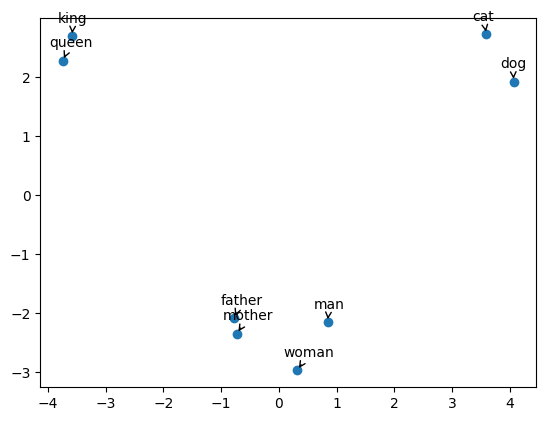

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 使用PCA降维算法，将向量vectors进行降维
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# 将单词和向量，绘制到二维平面上
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), textcoords='offset points', xytext=(-10, 10), arrowprops=dict(arrowstyle="->"))
plt.show()